In [1]:
### Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
### Import Datset
df = pd.read_csv("..\\Datasets\\data_breast-cancer-wiscons.csv")
# we change the class values (at the column number 2) from B to 0 and from M to 1
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
df.iloc[:,1].replace('B', 0,inplace=True)
df.iloc[:,1].replace('M', 1,inplace=True)

In [4]:
### Splitting Data

X = df[['texture_mean','area_mean','concavity_mean','area_se','concavity_se','fractal_dimension_se','smoothness_worst','concavity_worst', 'symmetry_worst','fractal_dimension_worst']]
y = df['diagnosis']

In [5]:
X

,texture_mean,area_mean,concavity_mean,area_se,concavity_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.30010,153.40,0.05373,0.006193,0.16220,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08690,74.08,0.01860,0.003532,0.12380,0.2416,0.2750,0.08902
2,21.25,1203.0,0.19740,94.03,0.03832,0.004571,0.14440,0.4504,0.3613,0.08758
3,20.38,386.1,0.24140,27.23,0.05661,0.009208,0.20980,0.6869,0.6638,0.17300
4,14.34,1297.0,0.19800,94.44,0.05688,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.24390,158.70,0.05198,0.004239,0.14100,0.4107,0.2060,0.07115
565,28.25,1261.0,0.14400,99.04,0.03950,0.002498,0.11660,0.3215,0.2572,0.06637
566,28.08,858.1,0.09251,48.55,0.04730,0.003892,0.11390,0.3403,0.2218,0.07820
567,29.33,1265.0,0.35140,86.22,0.07117,0.006185,0.16500,0.9387,0.4087,0.12400


In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)


In [8]:
#### Data Preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [9]:
##
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(x_train, y_train)
predictions = clf_lr.predict(x_test)

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Confusion Matrix : \n\n" , confusion_matrix(predictions,y_test))

print("Classification Report : \n\n" , classification_report(predictions,y_test),"\n")


Confusion Matrix : 

 [[106   4]
 [  2  59]]
Classification Report : 

               precision    recall  f1-score   support

           0       0.98      0.96      0.97       110
           1       0.94      0.97      0.95        61

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171
 



In [11]:
pickle.dump(clf_lr, open('breastcancermodel.pkl', 'wb'))
pickle.dump(scaler, open('breastcancerscaler.pkl', 'wb'))

model = pickle.load(open('breastcancermodel.pkl', 'rb'))
print(model)

LogisticRegression()


In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = dtc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8888888888888888


In [13]:
# Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Creating an instance of KNeighborsClassifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Training the model using the training data
knn.fit(X_train, y_train)

# Testing the model on the test data
accuracy = knn.score(X_test, y_test)

# Printing the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.8947368421052632


In [14]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Initialize a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate model performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest accuracy:', accuracy)


Random Forest accuracy: 0.9590643274853801


In [15]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



# Initialize a Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate model performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Naive Bayes accuracy:', accuracy)


Naive Bayes accuracy: 0.9122807017543859


In [16]:
# Import required libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Convert data to XGBoost DMatrix format
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {'objective': 'binary:logistic', 'max_depth': 3, 'learning_rate': 0.1}

# Train the XGBoost model
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100)

# Make predictions on the test data
y_pred = xgb_model.predict(test_dmatrix)

# Convert predicted probabilities to binary labels
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

# Evaluate model performance using accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print('XGBoost accuracy:', accuracy)


XGBoost accuracy: 0.9649122807017544


In [17]:
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



# Create a list of algorithms to evaluate
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('XGBOOSTER', xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1)))
models.append(('k-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))

# Evaluate each algorithm using 10-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: mean=%f (std=%f)" % (name, cv_results.mean(), cv_results.std()))

# Select the model with the best accuracy
import numpy as np
best_idx = np.argmax([np.mean(r) for r in results])
best_name = names[best_idx]
print('Best Algorithm:', best_name)


Decision Tree: mean=0.914808 (std=0.038839)
Naive Bayes: mean=0.939872 (std=0.046342)
XGBOOSTER: mean=0.952244 (std=0.032921)
k-NN: mean=0.866923 (std=0.052308)
SVM: mean=0.867051 (std=0.059002)
Random Forest: mean=0.959808 (std=0.028085)
Best Algorithm: Random Forest


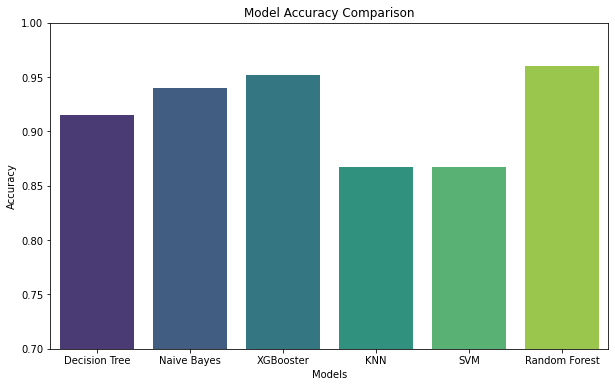

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these with your actual accuracy values
models = ['Decision Tree', 'Naive Bayes', 'XGBooster', 'KNN', 'SVM', 'Random Forest']
accuracies = [0.914808, 0.939872, 0.952244, 0.866923, 0.867051, 0.959808]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0.7, 1.0)  # Set y-axis limits for better visualization
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()
